# Normalization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [76]:
data = pd.read_csv('data_cleaned.csv')
data_copy = pd.read_csv('data_cleaned.csv') # Create a copy in case we want to see original values after transformation

In [77]:
# Drop rows where BsmtQual, BsmtCond, or BsmtExposure are missing values
data = data[(data['HasPorch']==1) & (data['HasBsmt'])==1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242D16A8860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000242D2663E80>]], dtype=object)

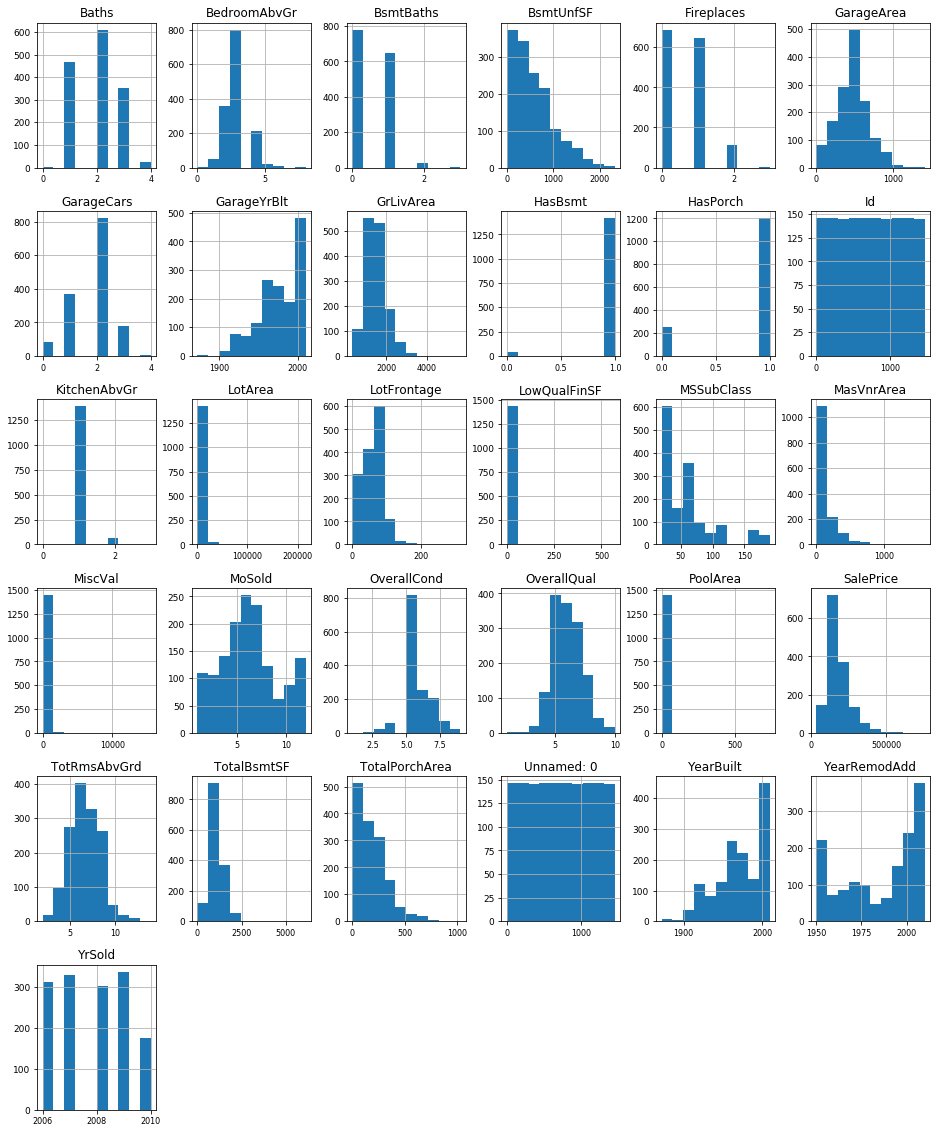

In [15]:
# What do the distributions of different variables look like?
data.hist(figsize=(16, 20), xlabelsize = 8, ylabelsize = 9)

In [81]:
# Drop KitchenAbvGrd, MiscVal, PoolArea, Unnamed 0
data = data.drop(['KitchenAbvGr', 'MiscVal', 'PoolArea', 'Unnamed: 0'], axis=1)

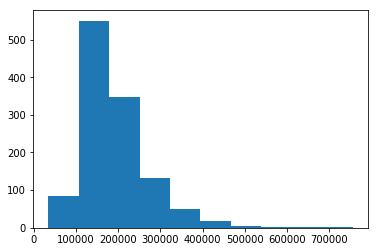

In [82]:
# Normalize Target Variable - Sale Price

plt.hist(data['SalePrice'])
data['SalePrice'] = np.log1p(data['SalePrice'])

(array([   5.,   12.,   54.,  184.,  470.,  398.,  219.,   90.,   19.,    6.]),
 array([ 10.46027076,  10.76769112,  11.07511148,  11.38253184,
         11.6899522 ,  11.99737256,  12.30479292,  12.61221328,
         12.91963363,  13.22705399,  13.53447435]),
 <a list of 10 Patch objects>)

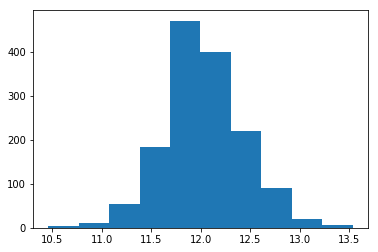

In [5]:
plt.hist(data['SalePrice'])

### Encode Variables

In [83]:
overallqual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
data.ExterQual= data.ExterQual.astype("category", ordered=True, categories=overallqual).cat.codes
data.ExterCond = data.ExterCond.astype("category", ordered=True, categories=overallqual).cat.codes
data.HeatingQC = data.HeatingQC.astype("category", ordered=True, categories=overallqual).cat.codes
data.KitchenQual = data.KitchenQual.astype("category", ordered=True, categories=overallqual).cat.codes

overallqual2 = ['NoBase', 'Po', 'Fa', 'TA', 'Gd', 'Ex'] 
data.BsmtQual = data.BsmtQual.astype("category", ordered=True, categories=overallqual2).cat.codes
data.BsmtCond = data.BsmtCond.astype("category", ordered=True, categories=overallqual2).cat.codes

overallqual3 = ['NoGarage', 'Po', 'Fa', 'TA', 'Gd', 'Ex']                                      
data.GarageQual = data.GarageQual.astype("category", ordered=True, categories=overallqual3).cat.codes
data.GarageCond = data.GarageCond.astype("category", ordered=True, categories=overallqual3).cat.codes

slope = ['Gtl', 'Mod', 'Sev']
data.LandSlope = data.LandSlope.astype("category", ordered=True, categories=slope).cat.codes

exposure = ['NoBase', 'No', 'Mn', 'Av', 'Gd']
data.BsmtExposure = data.BsmtExposure.astype('category', ordered=True, categories = exposure).cat.codes
                                              
# Central Air
data['CentralAir'] = data['CentralAir'].replace(['N', 'Y'], [0, 1])

### Determine if data requires normalization

In [84]:
# Make list of continuous variables
# Get all other continuous variables & calculate skew
cont_var = ['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual', # gets worse with transform
 'BsmtCond', # gets worse with transform
 'BsmtExposure', # sqrt
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC', # best not to do anything
 'LowQualFinSF', # most fall into one value
 'GrLivArea', 
 'BedroomAbvGr', # no need for transforming
 'KitchenQual',
 'TotRmsAbvGrd', # log works
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual', # leave as is, gets worse with transform
 'GarageCond', # leave as is, gets worse with transform
 'TotalPorchArea', 
 'BsmtBaths', # leave as is
 'Baths' # leave as is
  ]

In [85]:
skews = {}
for i in cont_var:
    skews[i] = stats.skew(data[i])

In [86]:
# Examine skews
skews

{'Baths': 0.12964662302489752,
 'BedroomAbvGr': 0.0721812539673279,
 'BsmtBaths': 0.36135796292008987,
 'BsmtCond': 0.5390001720431227,
 'BsmtExposure': 1.0481318623488582,
 'BsmtQual': 0.15478662258848988,
 'BsmtUnfSF': 0.8911756208743646,
 'ExterCond': 1.586148213000101,
 'ExterQual': 0.6366339255797602,
 'Fireplaces': 0.5304264080561616,
 'GarageArea': 0.21262055551685774,
 'GarageCars': -0.41052250891477016,
 'GarageCond': -3.7639178143149046,
 'GarageQual': -3.578646133700491,
 'GarageYrBlt': -0.8947393904890583,
 'GrLivArea': 1.447441265891866,
 'HeatingQC': -0.7164342644510681,
 'KitchenQual': 0.24517410032235046,
 'LotArea': 10.058702097235546,
 'LotFrontage': 0.07869882453235698,
 'LowQualFinSF': 8.705749668643351,
 'MasVnrArea': 2.6147515282791525,
 'OverallCond': 0.8831926509332569,
 'OverallQual': 0.2406554184679425,
 'TotRmsAbvGrd': 0.679306955235856,
 'TotalBsmtSF': 2.185736077160169,
 'TotalPorchArea': 1.248392087316906}

In [87]:
# For these variables, we will use log transform to remove skew
log_transform = ['LotArea', 'MasVnrArea', 'GrLivArea', 'TotRmsAbvGrd', 'ExterCond']

# For these variables, we will use sqrt to remove skew
sqrt = ['BsmtUnfSF', 'TotalBsmtSF', 'KitchenQual', 'Fireplaces', 'TotalPorchArea']

In [88]:
data_trans = data.copy()
skew_loop = []
skew_trans = []
for i in data[log_transform]:
    skew_loop.append(stats.skew(data[i]))
    data_trans[i] = np.log1p(data[i])
    skew_trans.append(stats.skew(data_trans[i]))

In [89]:
for x in data[sqrt]:
    skew_loop.append(stats.skew(data[x]))
    data_trans[x] = np.sqrt(data[x])
    skew_trans.append(stats.skew(data_trans[x]))

In [90]:
# Check skew of all transformed variables
skewed_vars = log_transform + sqrt
data_skew_check = data_trans[skewed_vars]
skew_check = data_skew_check.apply(lambda x: stats.skew(x))

In [91]:
skew_check

LotArea          -0.038760
MasVnrArea        0.412516
GrLivArea         0.037753
TotRmsAbvGrd     -0.026416
ExterCond        -0.119129
BsmtUnfSF        -0.197997
TotalBsmtSF       0.668915
KitchenQual      -0.092128
Fireplaces       -0.139741
TotalPorchArea    0.226507
dtype: float64

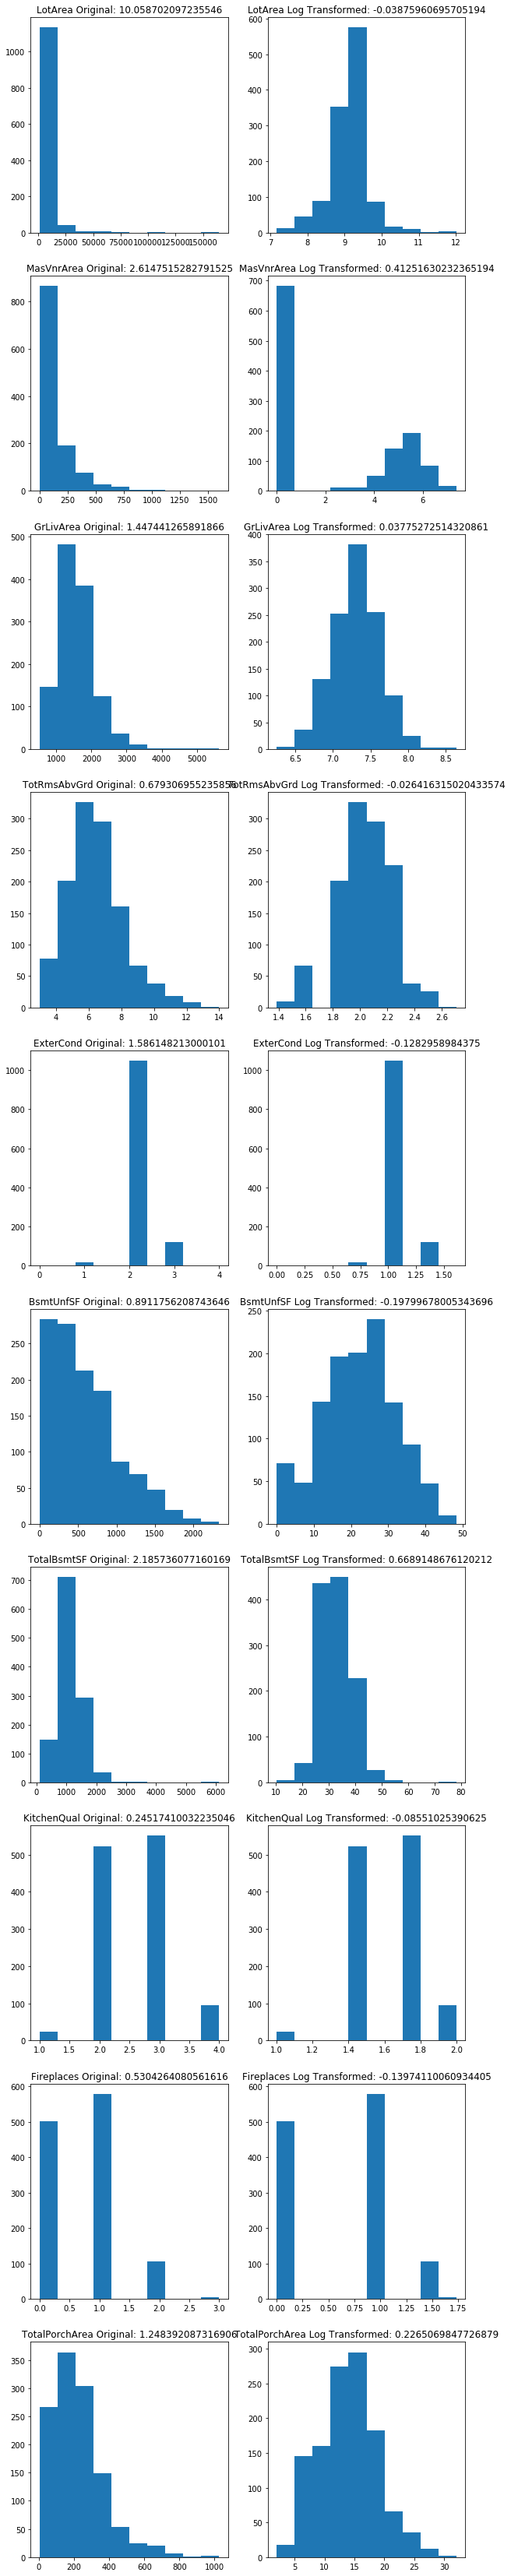

In [92]:
# Plot out graph of all variables for which skew was corrected
# Look at distribution before and after log/sqrt transformation
fig = plt.figure(figsize=(10, 60))
for i in range(len(skewed_vars)):
    axplot1 = fig.add_subplot(len(skewed_vars), 2, 2*i+1)
    axplot1.hist(data[skewed_vars[i]])
    axplot1.set_title(str(skewed_vars[i])+ " Original: "+ str(stats.skew(data[skewed_vars[i]])))
    axplot2 = fig.add_subplot(len(skewed_vars), 2, 2*i+2)
    axplot2.hist(data_trans[skewed_vars[i]])
    axplot2.set_title(str(skewed_vars[i])+ " Log Transformed: " + str(stats.skew(data_trans[skewed_vars[i]])))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000242D81BE278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000242D4B81978>]], dtype=object)

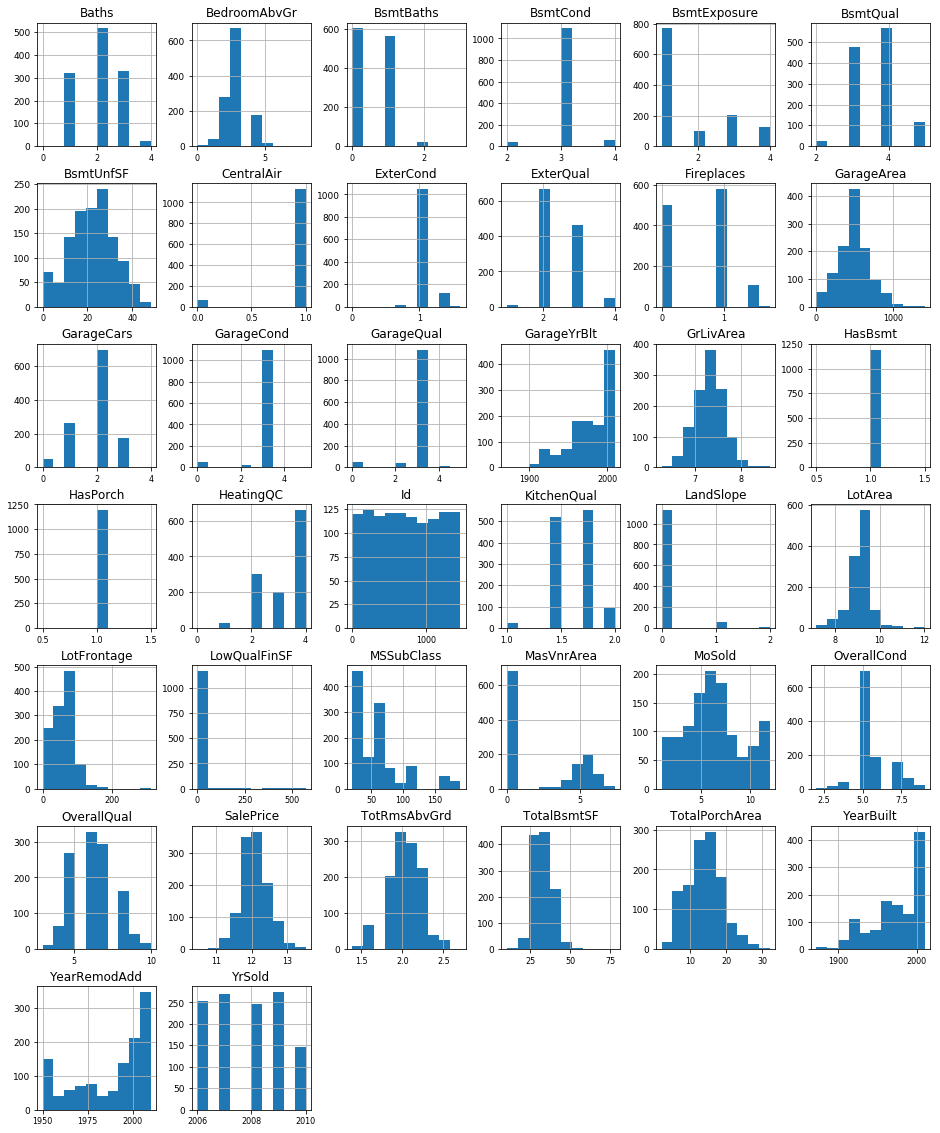

In [93]:
# What do the distributions of different variables look like?
data_trans.hist(figsize=(16, 20), xlabelsize = 8, ylabelsize = 9)

In [94]:
data_trans.describe()

,Id,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,GarageQual,GarageCond,MoSold,YrSold,SalePrice,HasBsmt,BsmtBaths,Baths,HasPorch,TotalPorchArea
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.0,1191.000000,1191.000000,1191.0,1191.000000
mean,728.207389,57.968094,57.695214,9.126418,0.062972,6.318220,5.585223,1973.606213,1987.603694,2.241689,...,2.848027,2.845508,6.349286,2007.821998,12.084323,1.0,0.511335,2.041982,1.0,14.004620
std,425.396886,41.641556,34.808774,0.510985,0.278467,1.337373,1.104270,31.513373,19.835350,2.655843,...,0.654328,0.649223,2.737646,1.330402,0.385904,0.0,0.537342,0.790650,0.0,4.887895
min,1.000000,20.000000,0.000000,7.170888,0.000000,3.000000,2.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,1.000000,2006.000000,10.460271,1.0,0.000000,0.000000,1.0,2.000000
25%,355.500000,20.000000,41.000000,8.948131,0.000000,5.000000,5.000000,1955.000000,1972.000000,0.000000,...,3.000000,3.000000,5.000000,2007.000000,11.831386,1.0,0.000000,1.000000,1.0,10.770330
50%,721.000000,60.000000,63.000000,9.168685,0.000000,6.000000,5.000000,1977.000000,1996.000000,0.000000,...,3.000000,3.000000,6.000000,2008.000000,12.072547,1.0,0.000000,2.000000,1.0,14.000000
75%,1100.500000,70.000000,80.000000,9.375219,0.000000,7.000000,6.000000,2003.000000,2004.000000,5.159039,...,3.000000,3.000000,8.000000,2009.000000,12.328295,1.0,1.000000,3.000000,1.0,17.014693
max,1460.000000,190.000000,313.000000,12.011644,2.000000,10.000000,9.000000,2010.000000,2010.000000,7.378384,...,5.000000,5.000000,12.000000,2010.000000,13.534474,1.0,3.000000,4.000000,1.0,32.046841


In [95]:
# write out normalized data
data_trans.to_csv('data_norm.csv')

# Scaling

In [84]:
data = pd.read_csv('data_norm.csv')

In [85]:
from sklearn import preprocessing
# Use standard scaler

# data frame to scale
varsdf = data.drop(['CentralAir', 'Unnamed: 0'], axis=1)

In [86]:
# One Hot Encoding
varsdf = pd.get_dummies(varsdf, columns=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
                                            'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                                            'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                            'Heating', 'Functional', 'GarageType', 
                                            'GarageFinish', 'PavedDrive', 'SaleType', 'Electrical', 'SaleCondition'])

In [36]:
data.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice', 'HasBsmt',
       'BsmtBaths', 'Baths', 'HasPorch', 'TotalPorchArea'],
      dtype='object')

In [87]:
cont_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 
             'TotalPorchArea']

In [88]:
varsdf = varsdf.drop(cont_vars, axis=1)

In [89]:
scale_df1 = data[cont_vars]

In [90]:
scaler = preprocessing.StandardScaler()

In [91]:
scaled_df = scaler.fit_transform(scale_df1)

In [92]:
scaled_df = pd.DataFrame(scaled_df, columns = cont_vars)

In [60]:
scaled_df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,GarageArea,SalePrice,TotalPorchArea
0,0.209943,-0.165197,1.145697,-0.983863,-0.585651,-0.123801,0.422024,0.264987,0.423537,-1.267820
1,0.641050,0.084587,-0.844414,-0.526004,0.472456,-0.123801,-0.530252,-0.151821,0.064015,0.666836
2,0.296164,0.395079,1.074333,-0.130237,-0.404319,-0.123801,0.558347,0.549174,0.603637,-1.539935
3,0.066241,0.074365,-0.844414,0.108915,-0.883139,-0.123801,0.434831,0.710214,-0.609004,0.719793
4,0.756012,0.859224,1.363265,-0.000652,0.187669,-0.123801,1.209109,1.629086,0.894114,0.533916


In [93]:
# Recombine to make whole dataset
stand_df = pd.concat([scaled_df, varsdf], axis=1)

In [78]:
stand_df.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,LowQualFinSF,GrLivArea,GarageArea,SalePrice,TotalPorchArea,...,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,1.191000e+03,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,-3.831248e-17,-8.983392e-16,-2.024689e-16,-5.537132e-17,-1.813085e-17,-1.491717e-16,-3.683964e-16,1.715206e-17,-1.613505e-15,-1.491483e-18,...,0.047859,0.012594,0.000840,0.938707,0.066331,0.000840,0.005038,0.011755,0.816961,0.099076
std,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,1.000420e+00,...,0.213557,0.111563,0.028976,0.239968,0.248964,0.028976,0.070828,0.107826,0.386861,0.298890
min,-1.658187e+00,-3.828591e+00,-8.444141e-01,-2.201623e+00,-3.795264e+00,-1.238011e-01,-3.307817e+00,-2.330590e+00,-4.210209e+00,-2.457021e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.798281e-01,-3.490560e-01,-8.444141e-01,-6.373823e-01,-7.157621e-01,-1.238011e-01,-6.517874e-01,-5.331056e-01,-6.557155e-01,-6.619718e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.524620e-01,8.275103e-02,-8.444141e-01,3.056876e-02,-9.630483e-02,-1.238011e-01,1.545632e-02,-3.814615e-02,-3.052872e-02,-9.455631e-04,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,6.410498e-01,4.871097e-01,1.098926e+00,6.680919e-01,7.044113e-01,-1.238011e-01,6.243499e-01,4.544451e-01,6.324741e-01,6.160806e-01,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7.337576e+00,5.648778e+00,1.934923e+00,2.604033e+00,7.671827e+00,1.118028e+01,4.165211e+00,4.385702e+00,3.759386e+00,3.692755e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000163201F2208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000163205D85C0>]], dtype=object)

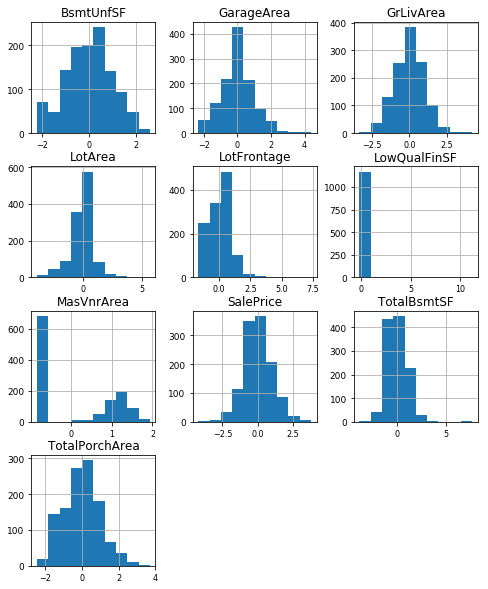

In [66]:
scaled_df.hist(figsize=(8, 10), xlabelsize = 8, ylabelsize = 9)

In [94]:
stand_df.to_csv('stand_df.csv', index=False)